Rafayel Amirkhanyan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [8]:
# Weights for each category (custom per user)
weights = {
    "fire": 10,
    "affordability": 10,
    "crime": 20,
    "mobility": 5
}

# Grading function

def normalize_dict_values(d):
    max_value = max(d.values(), default=0)
    return {key: 1 - (value / max_value) for key, value in d.items()}

In [9]:
# Neighborhoods
nb_data = pd.read_csv("./neighborhoods.csv", low_memory=False)

nb_data.columns



Index(['_id', 'objectid', 'fid_blockg', 'statefp10', 'countyfp10', 'tractce10',
       'blkgrpce10', 'geoid10', 'namelsad10', 'mtfcc10', 'funcstat10',
       'aland10', 'awater10', 'intptlat10', 'intptlon10', 'shape_leng',
       'fid_neighb', 'pghdb_sde_neighborhood_2010_area', 'perimeter',
       'neighbor', 'neighbor_i', 'hood', 'hood_no', 'acres', 'sqmiles',
       'dpwdiv', 'unique_id', 'sectors', 'shape_le_1', 'shape_ar_1',
       'page_number', 'plannerassign', 'globalid', 'created_user',
       'created_date', 'last_edited_user', 'last_edited_date', 'temp',
       'shape_area', 'shape_length'],
      dtype='object')

In [10]:
neighborhoods = nb_data["hood"].unique()

# Fire Data

In [2]:
fire_data = pd.read_csv("./fire-data.csv")


In [3]:
# Columns
fire_data.columns

Index(['_id', 'call_no', 'incident_type', 'type_description', 'address',
       'alarms', 'alarm_time', 'primary_unit', 'census_tract', 'neighborhood',
       'council_district', 'ward', 'tract', 'public_works_division',
       'pli_division', 'police_zone', 'fire_zone', 'latitude', 'longitude'],
      dtype='object')

In [4]:
fire_nbs = fire_data["neighborhood"].unique()[1:]
fire_nbs

array(['Fineview', 'Fairywood', 'South Side Flats', 'Allegheny Center',
       'Lincoln-Lemington-Belmar', 'Carrick', 'Beechview', 'Allentown',
       'Beltzhoover', 'Crafton Heights', 'Homewood North',
       'Squirrel Hill South', 'Perry North', 'Bedford Dwellings',
       'Homewood South', 'East Allegheny', 'Crawford-Roberts', 'Sheraden',
       'Middle Hill', 'Strip District', 'East Hills', 'Garfield',
       'Greenfield', 'North Shore', 'Spring Hill-City View',
       'Central Business District', 'Upper Hill', 'Manchester',
       'Overbrook', 'Polish Hill', 'Central Lawrenceville', 'Brookline',
       'Marshall-Shadeland', 'North Oakland', 'South Oakland',
       'Homewood West', 'East Liberty', 'Hazelwood',
       'Squirrel Hill North', 'Friendship', 'West Oakland',
       'Terrace Village', 'Brighton Heights', 'Troy Hill', 'Windgap',
       'Knoxville', 'Upper Lawrenceville', 'Arlington', 'Elliott',
       'South Side Slopes', 'Bloomfield', 'Perry South',
       'Central Norths

In [12]:
# Filter out confined fires (smaller fires)
fire_data = fire_data[fire_data["type_description"].str.contains("confined")==False]

In [6]:
# Load population data

pop_data = pd.read_csv("./population-data.csv")
pop_data.columns

Index(['_id', 'Neighborhood', '2010_Total_Population',
       '2010_OneRace_Population', '2010_White_Alone_Population',
       '2010_Black_Alone_Population',
       '2010_American_Indian_and_Alaska_Native_alone_population',
       '2010_Asian_Alone_Population',
       '2010_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2010_Any_other_single_race_alone_Popualtion',
       '2010_Population_two_or_more_races',
       '2010_Hispanic_or_Latino_Population', '2020_Total_Population',
       '2020_OneRace_Population', '2020_White_Alone_Population',
       '2020_Black_Alone_Population',
       '2020_American_Indian_and_Alaska_Native_alone_population',
       '2020_Asian_Alone_Population',
       '2020_Native_Hawaiian_and_Other_Pacific_Islander_alone_Populatio',
       '2020_Any_other_single_race_alone_Popualtion',
       '2020_Population_two_or_more_races',
       '2020_Hispanic_or_Latino_Population',
       'Change_2010_to_2020_Total_Population',
       'Change_2010_to_20

In [13]:
# Getting number of fire incidents per neighborhood
from collections import OrderedDict
data = {}
data_per_capita = {}

normalized_neighborhoods = list(set(neighborhoods).intersection(set(pop_data["Neighborhood"])))
for n in normalized_neighborhoods:
    population = pop_data.loc[pop_data["Neighborhood"] == n]["2020_Total_Population"].values[0]
    data[n] = fire_data.loc[fire_data["neighborhood"] == n].shape[0]
    data_per_capita[n] = data[n] / population



data = OrderedDict(sorted(data.items(), key=lambda item: item[1]))
data_per_capita = OrderedDict(sorted(data_per_capita.items(), key=lambda item: item[1]))


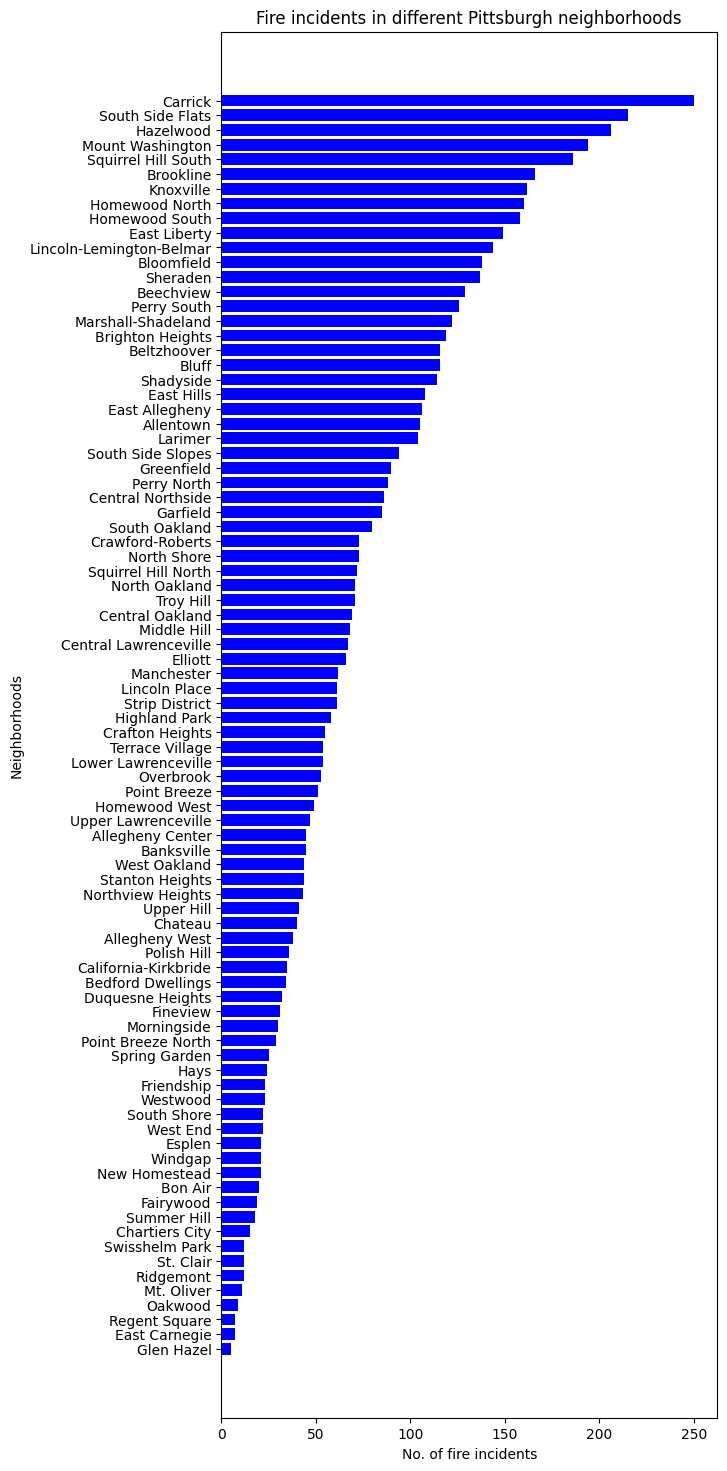

In [14]:
plt.figure().set_figheight(18)

neighborhoods = list(data.keys())
numOfIncidents = list(data.values())

plt.barh(neighborhoods, numOfIncidents, color = "blue" )

plt.ylabel("Neighborhoods")
plt.xlabel("No. of fire incidents")
plt.title("Fire incidents in different Pittsburgh neighborhoods")
plt.show()

<Figure size 500x480 with 0 Axes>

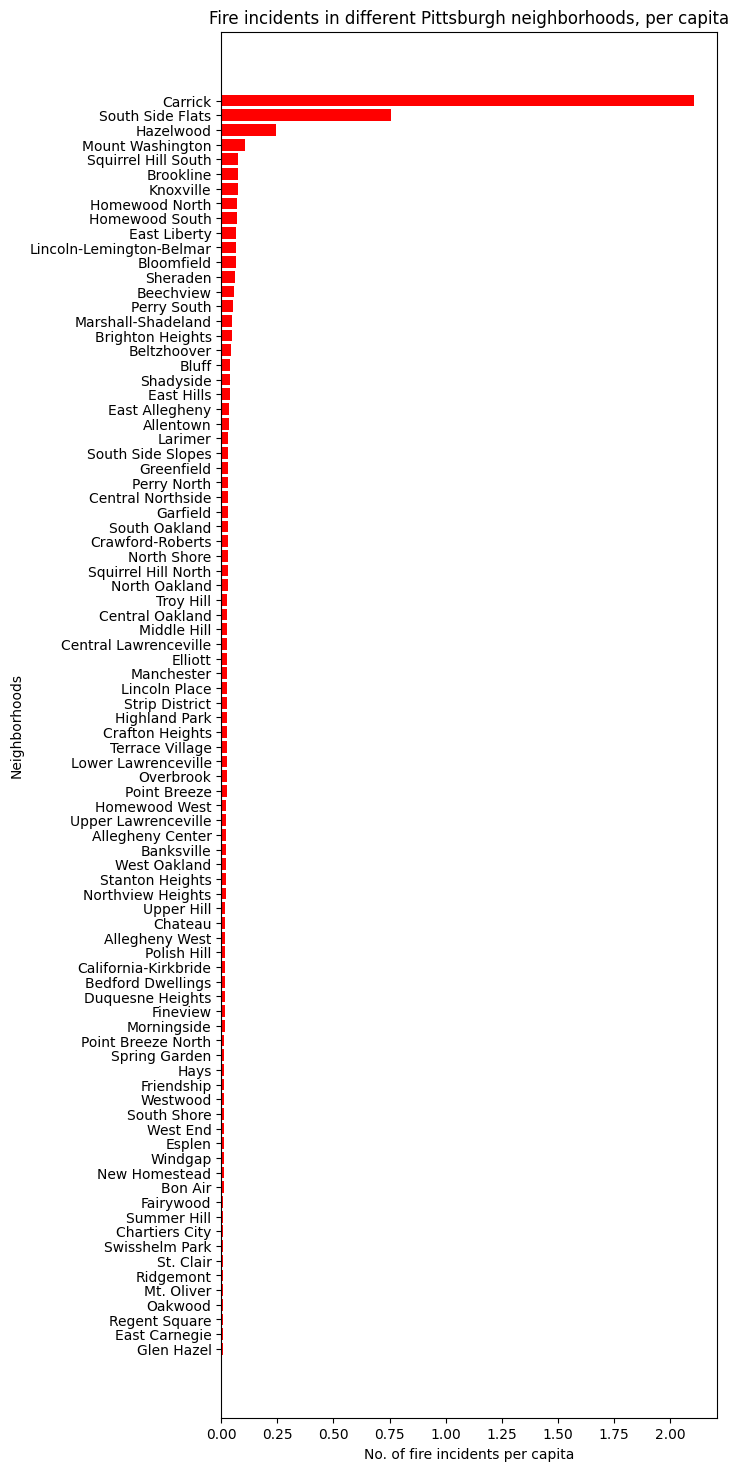

In [15]:
plt.figure().set_figwidth(5)
plt.figure().set_figheight(18)


neighborhoods_per_capita = list(data_per_capita.keys())
numOfIncidentsPerCapita = list(data_per_capita.values())
plt.barh(neighborhoods, numOfIncidentsPerCapita, color = "red")

plt.ylabel("Neighborhoods")
plt.xlabel("No. of fire incidents per capita")
plt.title("Fire incidents in different Pittsburgh neighborhoods, per capita")
plt.show()

In [16]:
# Grading

fire_ranks = normalize_dict_values(data)

fire_ranks_per_capita = normalize_dict_values(data_per_capita)


# Affordability

In [17]:
from collections import OrderedDict
neighborhood_property_values = pd.read_csv("./neighborhood-property-values.csv", low_memory=False)

pittsburgh_property_values = neighborhood_property_values[neighborhood_property_values["City"] == "Pittsburgh"]
pittsburgh_property_values = pittsburgh_property_values[["RegionName", *pd.date_range(start="2020-01-31", end="2024-10-31", freq="ME").strftime('%Y-%m-%d')]]

# Filter out none fire neighborhoods

# pittsburgh_property_values = pittsburgh_property_values[pittsburgh_property_values["RegionName"].isin(normalized_neighborhoods)]

mean_prices = {}
idx = 0
for row in pittsburgh_property_values.iterrows():
    hood = pittsburgh_property_values.iloc[idx, 0]
    mean = pittsburgh_property_values.iloc[idx, 1:].mean()
    mean_prices[hood] = float("{:.2f}".format(mean))
    idx += 1
    

mean_prices_data = OrderedDict(sorted(mean_prices.items(), key=lambda item: item[1]))

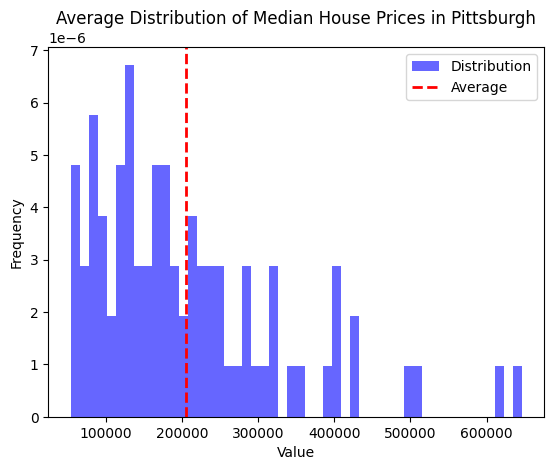

Average median house price: $205907.17


In [18]:
data = list(mean_prices_data.values())

average = np.mean(data)

plt.hist(data, bins=50, density=True, alpha=0.6, color='b', label='Distribution')
plt.axvline(average, color='r', linestyle='dashed', linewidth=2, label='Average')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Average Distribution of Median House Prices in Pittsburgh')
plt.legend()
plt.show()

print(f"Average median house price: ${average:.2f}")

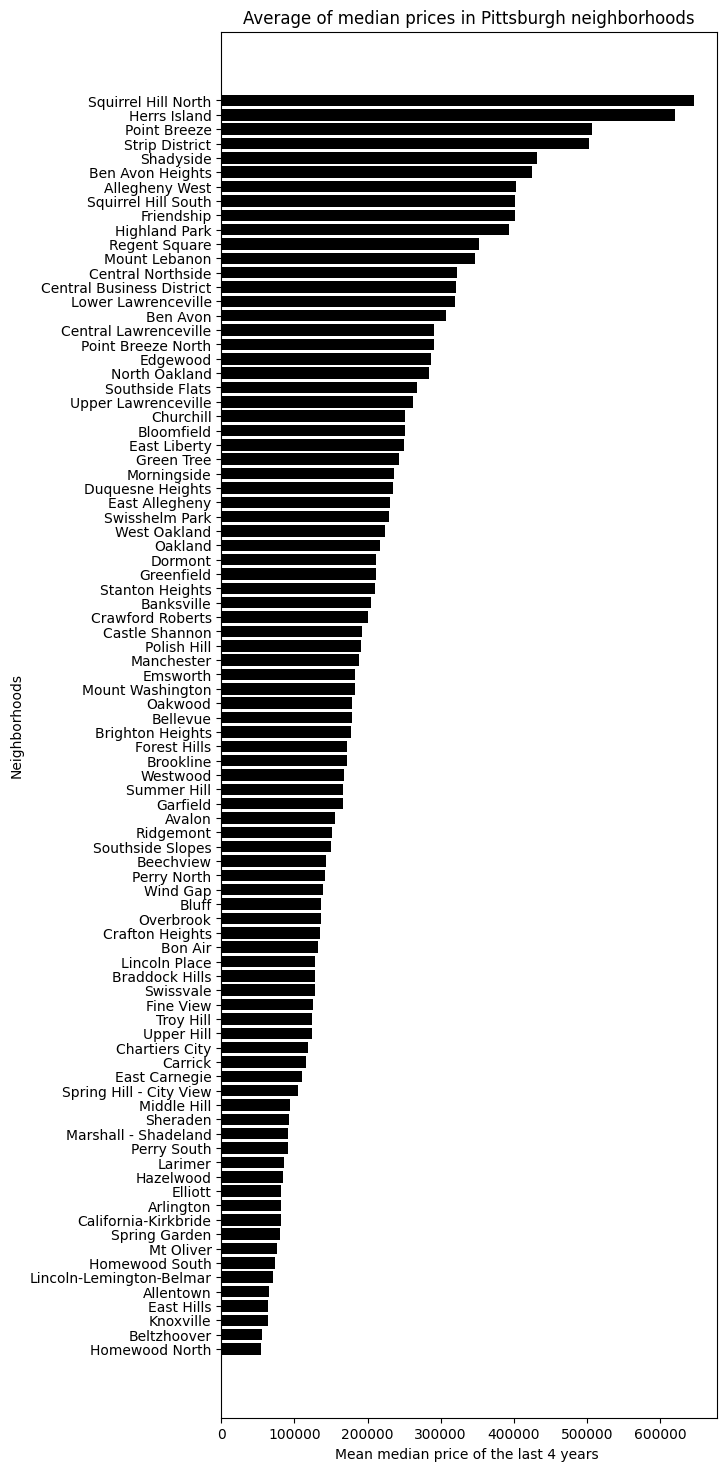

In [19]:
plt.figure().set_figheight(18)

neighborhoods = list(mean_prices_data.keys())
mean_price = list(mean_prices_data.values())

plt.barh(neighborhoods, mean_price, color = "black" )

plt.ylabel("Neighborhoods")
plt.xlabel("Mean median price of the last 4 years ")
plt.title("Average of median prices in Pittsburgh neighborhoods")
plt.show()

In [20]:
# Grading
affordability_ranks = normalize_dict_values(mean_prices_data)
affordability_ranks

{'Homewood North': 0.9160354599511453,
 'Beltzhoover': 0.913718699340649,
 'Knoxville': 0.9021001248304621,
 'East Hills': 0.9018970849071314,
 'Allentown': 0.8999794065035445,
 'Lincoln-Lemington-Belmar': 0.8914586035113785,
 'Homewood South': 0.8867211859178754,
 'Mt Oliver': 0.8821172343692854,
 'Spring Garden': 0.8748831456087457,
 'California-Kirkbride': 0.8733353977402701,
 'Arlington': 0.8731549453310943,
 'Elliott': 0.8728257775956878,
 'Hazelwood': 0.869629543713017,
 'Larimer': 0.8674170974756354,
 'Perry South': 0.8588369693606176,
 'Marshall - Shadeland': 0.8587254406066966,
 'Sheraden': 0.8575987431991301,
 'Middle Hill': 0.8538584583072573,
 'Spring Hill - City View': 0.837607817837442,
 'East Carnegie': 0.8286811827026768,
 'Carrick': 0.8205211451953276,
 'Chartiers City': 0.8172924775620372,
 'Upper Hill': 0.8085110589336266,
 'Troy Hill': 0.8070553486056924,
 'Fine View': 0.8062714736199509,
 'Swissvale': 0.8025867208824804,
 'Braddock Hills': 0.8025271480555665,
 'Lin